In [129]:
import os

import numpy as np
import pandas as pd
import h5py as h5
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
sns.set_context('talk')
%matplotlib inline

In [130]:
get_data = lambda path : h5.File(path, 'r')['obj_arr'].value.astype('float32')[:,0]

def plot_obs(DIR):
    files = [os.path.join(DIR,file) for file in os.listdir(DIR)]
    obss = [file for file in files if 'obss' in file][0]
    obss_data = get_data(obss)
    obss_data.shape

    done = [file for file in files if 'done' in file][0]
    done_data = get_data(done)

    for i, (obs, done) in enumerate(zip(obss_data, done_data)):
        plt.imshow(obs/5)
        plt.title('observation {}. done: {}'.format(i+1, done))
        plt.show()

In [131]:
check_see_door = lambda obs : (4 in obs[:,:,0])
check_door_locked = lambda obs : (4 in obs[:,:,0])&(2 in obs[:,:,-1])
check_see_key = lambda obs : (5 in obs[:,:,0])&(obs[3,6,0]!=5)
check_has_key = lambda obs : (obs[3,6,0]==5)
check_see_goal = lambda obs : (8 in obs[:,:,0])

def annotate_obs(DIR, plot=True):
    # grab files associated with DIR
    files = [os.path.join(DIR,file) for file in os.listdir(DIR)]
    
    # open and grab data observation and task data
    obss = [file for file in files if 'obss' in file][0]
    obss_data = get_data(obss)

    done = [file for file in files if 'done' in file][0]
    done_data = get_data(done)

    annotations = []
    # walk observations checking details
    for i, (obs, done) in enumerate(zip(obss_data, done_data)):
        see_door = check_see_door(obs)
        
        if see_door:
            door_locked = check_door_locked(obs)
        else:
            if len(annotations) == 0:
                door_locked = True
            else:
                door_locked = annotations[-1][1]
                
        see_key = check_see_key(obs)
        has_key = check_has_key(obs)
        see_goal = check_see_goal(obs)
        
        annotations.append([
            see_door,
            door_locked,
            see_key,
            has_key,
            see_goal
        ])
        
        if plot:
            plt.imshow(obs/5)
            print('observation {}. see door:{}, door locked:{},, see key:{}, has key:{}, see goal:{}, done: {}'.format(
                i+1, 
                see_door,
                door_locked,
                see_key, 
                has_key, 
                see_goal, 
                done))
            plt.show()
        
    return pd.DataFrame(columns=['see_door', 'door_locked', 'see_key', 'has_key', 'see_goal'], data=annotations)

In [125]:
DIR = 'feature_dir/DoorKey/env_MiniGrid-DoorKey-16x16-v0-ep_1-return_0.9876953363418579-frames_35.0/'
annotations = annotate_obs(DIR, plot=False)

In [132]:
root = 'feature_dir/DoorKey/'
DIRS = [os.path.join(root,DIR) for DIR in os.listdir('feature_dir/DoorKey/')]
for DIR in DIRS:
    annotation_path = os.path.join(DIR, 'annotations.csv')
    annotations = annotate_obs(DIR, plot=False)
    annotations.to_csv(annotation_path)
    print(annotation_path)

feature_dir/DoorKey/env_MiniGrid-DoorKey-16x16-v0-ep_12-return_0.9820703268051147-frames_51.0/annotations.csv
feature_dir/DoorKey/env_MiniGrid-DoorKey-16x16-v0-ep_30-return_0.980664074420929-frames_55.0/annotations.csv
feature_dir/DoorKey/env_MiniGrid-DoorKey-16x16-v0-ep_42-return_0.9898046851158142-frames_29.0/annotations.csv
feature_dir/DoorKey/env_MiniGrid-DoorKey-16x16-v0-ep_74-return_0.9796093702316284-frames_58.0/annotations.csv
feature_dir/DoorKey/env_MiniGrid-DoorKey-16x16-v0-ep_9-return_0.9782031178474426-frames_62.0/annotations.csv
feature_dir/DoorKey/env_MiniGrid-DoorKey-16x16-v0-ep_27-return_0.9876953363418579-frames_35.0/annotations.csv
feature_dir/DoorKey/env_MiniGrid-DoorKey-16x16-v0-ep_65-return_0.9817187786102295-frames_52.0/annotations.csv
feature_dir/DoorKey/env_MiniGrid-DoorKey-16x16-v0-ep_1-return_0.9876953363418579-frames_35.0/annotations.csv
feature_dir/DoorKey/env_MiniGrid-DoorKey-16x16-v0-ep_50-return_0.9785546660423279-frames_61.0/annotations.csv
feature_dir/D

observation 1. see door:True, door locked:True,, see key:False, has key:False, see goal:False, done: 0.0


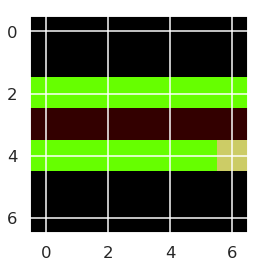

observation 2. see door:True, door locked:True,, see key:False, has key:False, see goal:False, done: 0.0


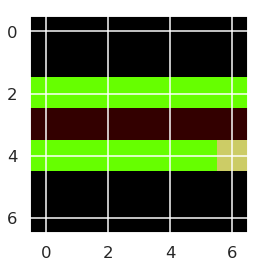

observation 3. see door:False, door locked:True,, see key:True, has key:False, see goal:False, done: 0.0


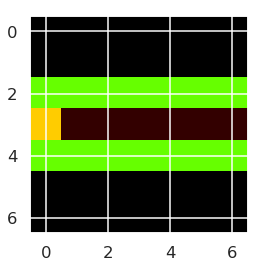

observation 4. see door:False, door locked:True,, see key:True, has key:False, see goal:False, done: 0.0


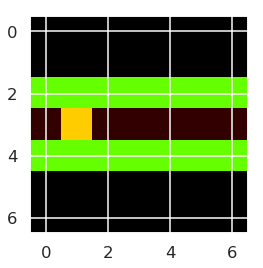

observation 5. see door:False, door locked:True,, see key:True, has key:False, see goal:False, done: 0.0


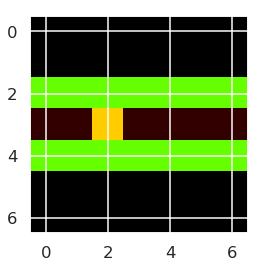

observation 6. see door:False, door locked:True,, see key:True, has key:False, see goal:False, done: 0.0


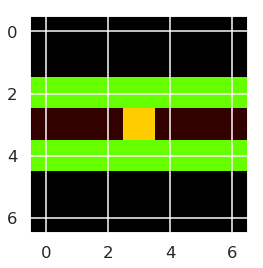

observation 7. see door:False, door locked:True,, see key:True, has key:False, see goal:False, done: 0.0


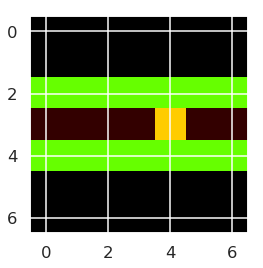

observation 8. see door:False, door locked:True,, see key:True, has key:False, see goal:False, done: 0.0


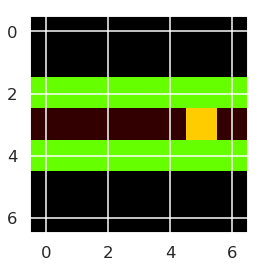

observation 9. see door:False, door locked:True,, see key:False, has key:True, see goal:False, done: 0.0


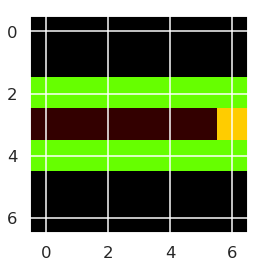

observation 10. see door:False, door locked:True,, see key:False, has key:True, see goal:False, done: 0.0


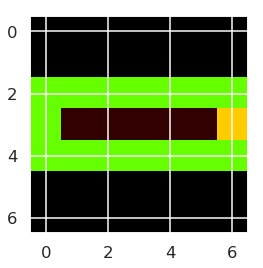

observation 11. see door:False, door locked:True,, see key:False, has key:True, see goal:False, done: 0.0


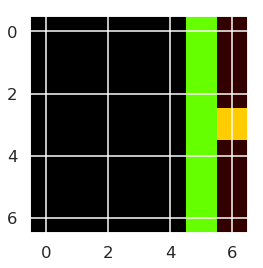

observation 12. see door:False, door locked:True,, see key:False, has key:True, see goal:False, done: 0.0


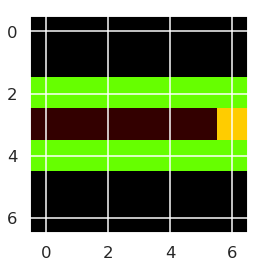

observation 13. see door:True, door locked:True,, see key:False, has key:True, see goal:False, done: 0.0


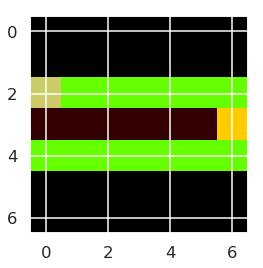

observation 14. see door:True, door locked:True,, see key:False, has key:True, see goal:False, done: 0.0


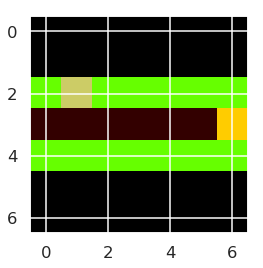

observation 15. see door:True, door locked:True,, see key:False, has key:True, see goal:False, done: 0.0


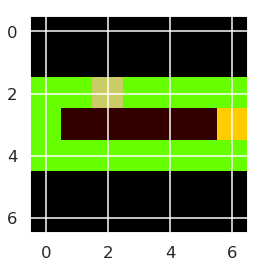

observation 16. see door:True, door locked:True,, see key:False, has key:True, see goal:False, done: 0.0


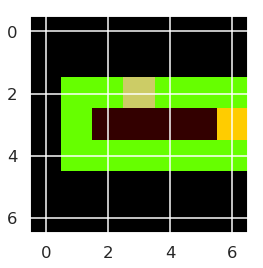

observation 17. see door:True, door locked:True,, see key:False, has key:True, see goal:False, done: 0.0


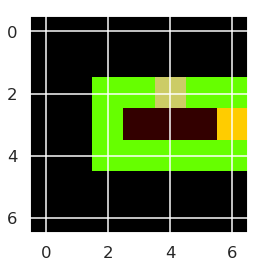

observation 18. see door:True, door locked:True,, see key:False, has key:True, see goal:False, done: 0.0


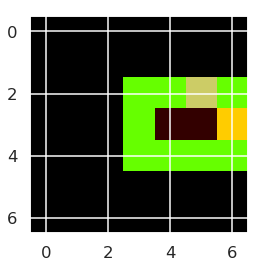

observation 19. see door:True, door locked:True,, see key:False, has key:True, see goal:False, done: 0.0


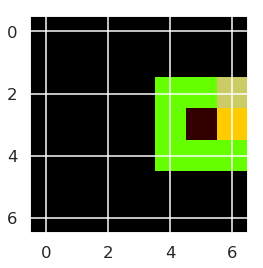

observation 20. see door:True, door locked:True,, see key:False, has key:True, see goal:False, done: 0.0


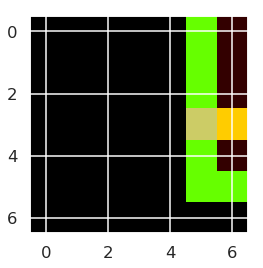

observation 21. see door:True, door locked:False,, see key:False, has key:True, see goal:False, done: 0.0


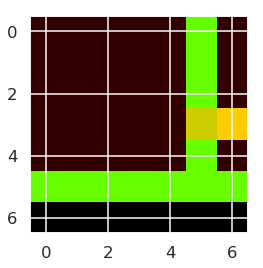

observation 22. see door:False, door locked:False,, see key:False, has key:True, see goal:False, done: 0.0


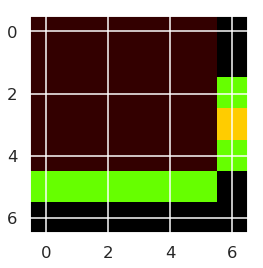

observation 23. see door:False, door locked:False,, see key:False, has key:True, see goal:False, done: 0.0


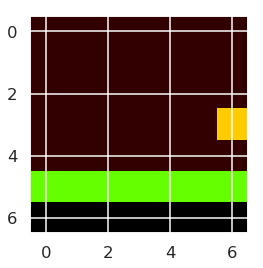

observation 24. see door:False, door locked:False,, see key:False, has key:True, see goal:False, done: 0.0


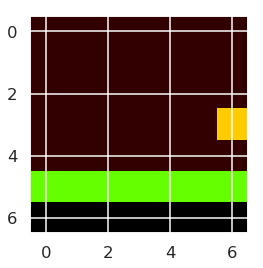

observation 25. see door:False, door locked:False,, see key:False, has key:True, see goal:False, done: 0.0


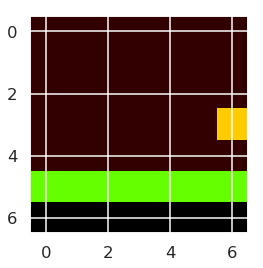

observation 26. see door:False, door locked:False,, see key:False, has key:True, see goal:False, done: 0.0


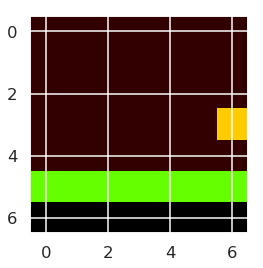

observation 27. see door:False, door locked:False,, see key:False, has key:True, see goal:False, done: 0.0


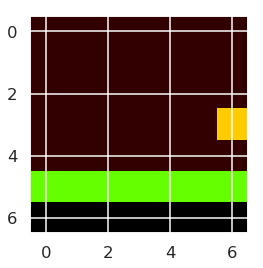

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


observation 28. see door:False, door locked:False,, see key:False, has key:True, see goal:True, done: 0.0


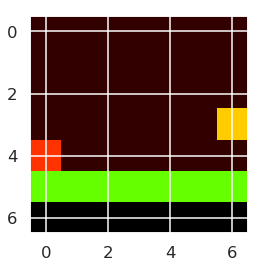

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


observation 29. see door:False, door locked:False,, see key:False, has key:True, see goal:True, done: 0.0


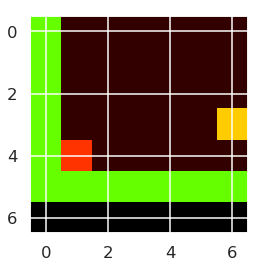

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


observation 30. see door:False, door locked:False,, see key:False, has key:True, see goal:True, done: 0.0


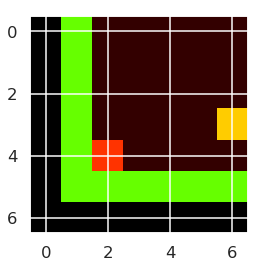

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


observation 31. see door:False, door locked:False,, see key:False, has key:True, see goal:True, done: 0.0


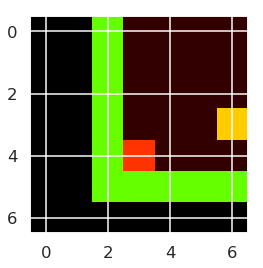

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


observation 32. see door:False, door locked:False,, see key:False, has key:True, see goal:True, done: 0.0


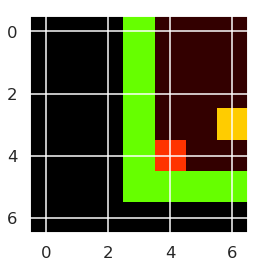

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


observation 33. see door:False, door locked:False,, see key:False, has key:True, see goal:True, done: 0.0


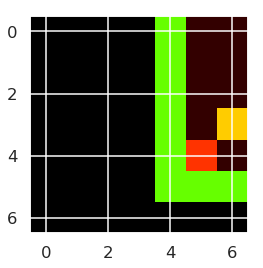

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


observation 34. see door:False, door locked:False,, see key:False, has key:True, see goal:True, done: 0.0


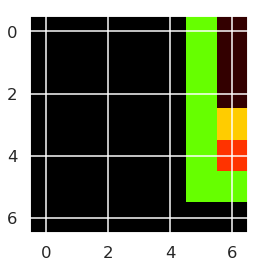

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


observation 35. see door:False, door locked:False,, see key:False, has key:True, see goal:True, done: 1.0


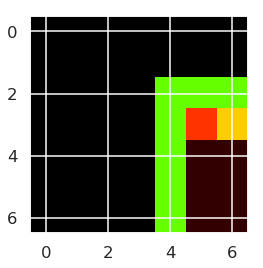

,see_door,door_locked,see_key,has_key,see_goal
0,True,True,False,False,False
1,True,True,False,False,False
2,False,True,True,False,False
3,False,True,True,False,False
4,False,True,True,False,False
5,False,True,True,False,False
6,False,True,True,False,False
7,False,True,True,False,False
8,False,True,False,True,False
9,False,True,False,True,False


In [117]:
DIR = 'feature_dir/DoorKey/env_MiniGrid-DoorKey-16x16-v0-ep_1-return_0.9876953363418579-frames_35.0/'
annotate_obs(DIR)